<a id='top'></a>

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# %matplotlib nbagg 
%matplotlib notebook
# %matplotlib inline



## Third party 
import numpy as np
import os, time, zarr, sys
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

import unslice.IO as io
from unslice.utils import *
from unslice.registration.featmatch import *
from unslice.registration.transform import *
from unslice.registration.rigid import *
from unslice.registration.gpu_transform import *
from unslice.registration.utils import *
from unslice.segmentation import *
from unslice.tracing.pyoof import OOF, apply_oof_v2
from unslice.tracing.skel import *
from unslice.flatten import *
from unslice.lightsheetcorrect import *




In [2]:
# Parameters that are constant throughout notebook
working_dir = '/mnt/beegfs/webster/fig3_dfly' 

def bdir(fname):
    return os.path.join(working_dir, fname)

# prefix to add to the beginning of each filename 
name_prefix = '#3-gfap_fov55' #1
name_prefix2 = '#4-gfap_fov55' #2

# Table of contents

### Pre-processing
[1. Convert to zarr](#convert)<br>

### Warp using lectin deformation fields 
[13. Flatten warp](#flattenwarp)<br>
[14. TPS lectin warp](#anchorwarp)<br>

### Transformation (round 1)
[16. Feature match](#featmatch)<br>
[17. TPS transformation (Round 1)](#tpswarp)<br>

[Warp points back, use all at once](#theend)<br>
[Round 2 warp](#round2)

# Convert to zarr
<a id='convert'></a>

[Return to top](#top)

In [ ]:
# Parameters for converting to zarr

slab_path = '/mnt/beegfs/juhyuk/Dfly/2021-12-24-#3R1.po.lec.gfap.nfh.pv/Channel5_tiffs'
slab_zarr_path = bdir(name_prefix+'.zarr')
pc2_img_size = (31505,18748,414)


## Optional parameters 
load_num_slices = 20 # should be smaller than z chunk size, default None 
resample_num_slices = 1 # number of slices to be processed in one go for resampling, default 1
resample_factor = (1,1) # original is 0.277 x 0.277 x 1
chunks = (200,200,200) 
num_workers = 20 
file_names = 'img_[0-9]{4}.tiff' # default 'img_[0-9]{4}.tiff'

## crop
xrange = [7800,11800] # default None
yrange = [8000,12000] # default None
zrange = [14,414] # default None

## rotate
lateral_rotate_angle = None # default None

## flip
flip = (0,0,0) # default (0,0,0)


#############
start = time.time()
utils.convert_to_zarr_v2(slab_path, slab_zarr_path, pc2_img_size, load_num_slices=load_num_slices,
                        resample_num_slices=resample_num_slices, file_names=file_names, 
                        chunks=chunks, num_workers=num_workers, lateral_rotate_angle=lateral_rotate_angle,
                        flip=flip, crop_xcoords=xrange, crop_ycoords=yrange, crop_zcoords=zrange,
                        resample_factor=resample_factor)
print(time.time()-start, 'seconds elapsed')

Processing chunk x:7800-11800, y:8000-12000, z:14-34


  0%|          | 0/20 [00:00<?, ?it/s]TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored

TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored



TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored



TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored


TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored


TiffFile: the 'fastij' argument is ignored
100%|██████████| 20/20 [01:17<00:00,  3.87s/it]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 400/400 [00:18<00:00, 21.65it/s]

Processing chunk x:7800-11800, y:8000-12000, z:34-54



  0%|          | 0/20 [00:00<?, ?it/s]TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored



TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored

TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored


TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored

TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored



TiffFile: the 'fastij' argument is ignored
100%|██████████| 20/20 [01:18<00:00,  3.91s/it]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 400/400 [00:22<00:00, 17.50it/s]

Processing chunk x:7800-11800, y:8000-12000, z:54-74



  0%|          | 0/20 [00:00<?, ?it/s]TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored


TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored

TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored

100%|██████████| 20/20 [01:19<00:00,  3.95s/it]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 400/400 [00:29<00:00, 13.61it/s]

Processing chunk x:7800-11800, y:8000-12000, z:74-94



  0%|          | 0/20 [00:00<?, ?it/s]TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored

TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored

TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignored

TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored


TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored
TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored


TiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignoredTiffFile: the 'fastij' argument is ignored


100%|██████████| 20/20 [01:29<00:00,  4.45s/it]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 400/400 [00:34<00:00, 11.67it/s]

Processing chunk x:7800-11800, y:8000-12000, z:94-114



  0%|          | 0/20 [00:00<?, ?it/s]TiffFile: the 'fastij' argument is ignored

In [17]:
# Convert zarr to tiff
tiff_path = bdir(name_prefix+'_tiffs')
convert_zarr_to_tiff(bdir(name_prefix+'.zarr'), tiff_path, num_workers=None)

Loading z 0 - 200


100%|██████████| 200/200 [06:13<00:00,  1.98s/it]


Loading z 200 - 400


100%|██████████| 200/200 [06:28<00:00,  2.03s/it]


## Convert to zarr of the bottom slab

In [5]:
# Convert from already cropped tiff file (unstitched)
slab_path = bdir("#4-gfap_fov55.tif")
slab_zarr_path = bdir(name_prefix2+'.zarr')
pc2_img_size = (2048,2048,315)


## Optional parameters 
resample_factor = (1,1) # original is 0.277 x 0.277 x 1
chunks = (200,)*3

## crop
xrange = [0,2048] # default None
yrange = [0,2048] # default None
zrange = [0,315] # default None

## rotate
lateral_rotate_angle = None # default None

## flip
flip = (0,0,0) # default (0,0,0)


#############
start = time.time()
utils.convert_to_zarr_v2(slab_path, slab_zarr_path, pc2_img_size, chunks=chunks,
                         lateral_rotate_angle=lateral_rotate_angle, flip=flip, 
                        crop_xcoords=xrange, crop_ycoords=yrange, crop_zcoords=zrange,
                        resample_factor=resample_factor)
print(time.time()-start, 'seconds elapsed')

TiffFile: the 'fastij' argument is ignored


337.41326665878296 seconds elapsed


In [16]:
# Convert zarr to tiff
tiff_path = bdir(name_prefix2+'_tiffs')
convert_zarr_to_tiff(bdir(name_prefix2+'.zarr'), tiff_path, num_workers=None)

Loading z 0 - 200


100%|██████████| 200/200 [01:09<00:00,  2.42it/s]


Loading z 200 - 315


100%|██████████| 115/115 [00:41<00:00,  3.55it/s]


# Surface flattening

[Return to top](#top)

<a id='flatten'></a>

## Get the resampled grids for these data

In [6]:
# 3 flatten

grid_path = bdir('#3-lec_grid_flatten.npy')
original_shape = (8456, 4648, 400)
new_grid_spacing = 3*(32,)

# We will compute the grid spacing from the zarr specifically 
b_path = None 
save_grid_path = bdir("grid_#3_flatten_fov55.npy")
resample_factor = (0.28,0.28,1) 

# these are the coordinates in original image of FOV 
xrange = [7800,11800] 
yrange = [8000,12000]
zrange = [14,414]

# Cropping purposes (only matters for determining grid) 
diffs = [0,1700,14]


################
grid_new = resample_grid(grid_path, original_shape, new_grid_spacing, resample_factor=resample_factor, b_path=b_path,
                         xrange=xrange, yrange=yrange, zrange=zrange, diffs=diffs, save_grid_path=save_grid_path)

(114, 114, 32)


In [ ]:
# 4 flatten

grid_path = bdir('#4-lec_grid_flatten.npy')
original_shape = (8400, 4816, 341)
new_grid_spacing = 3*(32,)

# We will compute the grid spacing from the zarr specifically 
b_path = None 
save_grid_path = bdir("grid_#4_flatten_fov55.npy")
resample_factor = (0.28,0.28,1) 

# these are the coordinates in original image of FOV 
xrange = [9210,11258]
yrange = [9270,11318]
# Need to try to include the full image (only matters for this dataset without good stitching)
zrange = [0,341] #[0,315]

# Cropping purposes (only matters for determining grid) 
diffs = [0,1482,0]


################
grid_new = resample_grid(grid_path, original_shape, new_grid_spacing, resample_factor=resample_factor, b_path=b_path,
                         xrange=xrange, yrange=yrange, zrange=zrange, diffs=diffs, save_grid_path=save_grid_path)

In [ ]:
# 4 TPS lectin warp 

grid_path = bdir('grid_anchor_tps_allanchors_r2.npy')
original_shape = (8456, 4648, 556) # will be the shape of the fixed image aka #3 here 
new_grid_spacing = 3*(32,)

# We will compute the grid spacing from the zarr specifically 
b_path = bdir('b.npy')
save_grid_path = bdir("grid_anchor_tps_allanchors_r2_fov55.npy")
resample_factor = (0.28,0.28,1) 

# these are the coordinates in original image of FOV 
xrange = [9210,11258]
yrange = [9270,11318]
zrange = [0,556]

# Cropping purposes (only matters for determining grid) 
diffs = [0,1482,0]


################
grid_new = resample_grid(grid_path, original_shape, new_grid_spacing, resample_factor=resample_factor, b_path=b_path,
                         xrange=xrange, yrange=yrange, zrange=zrange, diffs=diffs, save_grid_path=save_grid_path)

## Flatten warp the slabs

[Return to top](#top)

<a id='flattenwarp'></a>

In [40]:

moving_pts_paths = [bdir('#3-lec_anchor_pts_flat.npy')] # doesn't actually matter for this 
fixed_pts_paths =  [bdir('#3-lec_anchor_pts_flat.npy')]

fixed_zarr_path = bdir(name_prefix+'.zarr') 
moving_zarr_path = bdir(name_prefix+'.zarr')
warped_zarr_path = bdir(name_prefix+'_flattened.zarr')


# Parameters for TPS zarr warp
grid_spacing = (32,32,32)
chunks=3*(200,)
nb_workers = 8 

# affine parameters 
R_path = None
b_path = None

# grid I/O 
save_grid_values_path = None
use_grid_values_path = bdir("grid_#3_flatten_fov55.npy")

# anchor parameters (using the surface on the other side and manually identified anchors on the cut surface)
static_pts_paths = None

##########################

TPS_warp(moving_zarr_path, fixed_zarr_path, warped_zarr_path, moving_pts_paths, fixed_pts_paths,
         static_pts_paths=static_pts_paths, R_path=R_path, b_path=b_path,
          grid_spacing=grid_spacing, smooth=2, chunks=chunks,
          nb_workers=nb_workers, padding=2, save_grid_values_path=save_grid_values_path, 
          show_residuals=True, use_grid_values_path=use_grid_values_path)

# Convert zarr to tiff
tiff_path = warped_zarr_path[:-5]+'_tiffs'
convert_zarr_to_tiff(warped_zarr_path, tiff_path, num_workers=None)

Loading grid values...
Warping image...


100%|██████████| 800/800 [02:24<00:00,  5.55it/s]


Time elapsed: 7.615488 minutes
Loading z 0 - 200


100%|██████████| 200/200 [03:11<00:00,  1.10it/s]


Loading z 200 - 400


100%|██████████| 200/200 [03:06<00:00,  1.00s/it]


In [41]:
# Bottom slab 
moving_pts_paths = [bdir('#3-lec_anchor_pts_flat.npy')] # doesn't actually matter for this 
fixed_pts_paths =  [bdir('#3-lec_anchor_pts_flat.npy')]

fixed_zarr_path = bdir(name_prefix2+'.zarr') 
moving_zarr_path = bdir(name_prefix2+'.zarr')
warped_zarr_path = bdir(name_prefix2+'_flattened.zarr')


# Parameters for TPS zarr warp
grid_spacing = (32,32,32)
chunks=3*(200,)
nb_workers = 8 

# affine parameters 
R_path = None
b_path = None

# grid I/O 
save_grid_values_path = None
use_grid_values_path = bdir("grid_#4_flatten_fov55.npy")

# anchor parameters (using the surface on the other side and manually identified anchors on the cut surface)
static_pts_paths = None

##########################

TPS_warp(moving_zarr_path, fixed_zarr_path, warped_zarr_path, moving_pts_paths, fixed_pts_paths,
         static_pts_paths=static_pts_paths, R_path=R_path, b_path=b_path,
          grid_spacing=grid_spacing, smooth=2, chunks=chunks,
          nb_workers=nb_workers, padding=2, save_grid_values_path=save_grid_values_path, 
          show_residuals=True, use_grid_values_path=use_grid_values_path)

# Convert zarr to tiff
tiff_path = warped_zarr_path[:-5]+'_tiffs'
convert_zarr_to_tiff(warped_zarr_path, tiff_path, num_workers=None)

Loading grid values...
Warping image...


100%|██████████| 242/242 [00:42<00:00,  5.68it/s]


Time elapsed: 2.747534 minutes
Loading z 0 - 200


100%|██████████| 200/200 [01:02<00:00,  2.50it/s]


Loading z 200 - 315


100%|██████████| 115/115 [00:47<00:00,  2.23it/s]


## TPS warp using lectin grid

[Return to top](#top)

<a id='anchorwarp'></a>

In [42]:
moving_pts_paths = [bdir('#3-lec_anchor_pts_flat.npy')] # doesn't actually matter for this 
fixed_pts_paths =  [bdir('#3-lec_anchor_pts_flat.npy')]

fixed_zarr_path = bdir(name_prefix2+'_flattened.zarr') 
moving_zarr_path = bdir(name_prefix2+'_flattened.zarr')
warped_zarr_path = bdir(name_prefix2+'_flattened_lectps.zarr')


# Parameters for TPS zarr warp
grid_spacing = (32,32,32)
chunks=3*(200,)
nb_workers = 8 

# affine parameters 
R_path = bdir('R.npy')
b_path = bdir('b.npy')

# grid I/O 
save_grid_values_path = None
use_grid_values_path = bdir("grid_anchor_tps_allanchors_r2_fov55.npy")

# anchor parameters (using the surface on the other side and manually identified anchors on the cut surface)
static_pts_paths = None

##########################

TPS_warp(moving_zarr_path, fixed_zarr_path, warped_zarr_path, moving_pts_paths, fixed_pts_paths,
         static_pts_paths=static_pts_paths, R_path=R_path, b_path=b_path,
          grid_spacing=grid_spacing, smooth=2, chunks=chunks,
          nb_workers=nb_workers, padding=2, save_grid_values_path=save_grid_values_path, 
          show_residuals=True, use_grid_values_path=use_grid_values_path)

# Convert zarr to tiff
tiff_path = warped_zarr_path[:-5]+'_tiffs'
convert_zarr_to_tiff(warped_zarr_path, tiff_path, num_workers=None)

Loading grid values...
Warping image...


100%|██████████| 363/363 [00:55<00:00,  6.49it/s]


Time elapsed: 2.723253 minutes
Loading z 0 - 200


100%|██████████| 200/200 [01:08<00:00,  3.03it/s]


Loading z 200 - 400


100%|██████████| 200/200 [01:13<00:00,  3.15it/s]


Loading z 400 - 530


100%|██████████| 130/130 [00:39<00:00,  3.65it/s]


# PV GFAP TPS

In [3]:
moving_pts_paths = None # doesn't actually matter for this 
fixed_pts_paths =  None

fixed_zarr_path = bdir(name_prefix2+'_flattened_lectps.zarr') 
moving_zarr_path = bdir(name_prefix2+'_flattened_lectps.zarr')
warped_zarr_path = bdir(name_prefix2+'_flattened_lectps_pvgfaptps.zarr')


# Parameters for TPS zarr warp
grid_spacing = 3*(16,)
chunks=3*(200,)
nb_workers = 8 

# affine parameters 
R_path = bdir('R_pvgfap_fov55.npy')
b_path = bdir('b_pvgfap_fov55.npy')

# grid I/O 
save_grid_values_path = None
use_grid_values_path = bdir('grid_pvgfap_tps_fov55.npy')

# anchor parameters (using the surface on the other side and manually identified anchors on the cut surface)
static_pts_paths = None

##########################

TPS_warp(moving_zarr_path, fixed_zarr_path, warped_zarr_path, moving_pts_paths, fixed_pts_paths,
         static_pts_paths=static_pts_paths, R_path=R_path, b_path=b_path,
          grid_spacing=grid_spacing, smooth=2, chunks=chunks,
          nb_workers=nb_workers, padding=2, save_grid_values_path=save_grid_values_path, 
          show_residuals=True, use_grid_values_path=use_grid_values_path)

# Convert zarr to tiff
tiff_path = warped_zarr_path[:-5]+'_tiffs'
convert_zarr_to_tiff(warped_zarr_path, tiff_path, num_workers=None)

Loading grid values...
Warping image...


100%|██████████| 363/363 [00:41<00:00,  8.82it/s]


Time elapsed: 1.708825 minutes
Loading z 0 - 200


100%|██████████| 200/200 [00:45<00:00,  3.82it/s]


Loading z 200 - 400


100%|██████████| 200/200 [00:39<00:00,  5.57it/s]


Loading z 400 - 526


100%|██████████| 126/126 [00:23<00:00,  5.36it/s]


In [4]:
moving_pts_paths = None # doesn't actually matter for this 
fixed_pts_paths =  None

fixed_zarr_path = bdir(name_prefix2+'_flattened_lectps_pvgfaptps.zarr') 
moving_zarr_path = bdir(name_prefix2+'_flattened_lectps_pvgfaptps.zarr')
warped_zarr_path = bdir(name_prefix2+'_flattened_lectps_pvgfaptps_nfhtps.zarr')


# Parameters for TPS zarr warp
grid_spacing = 3*(16,)
chunks=3*(200,)
nb_workers = 8 

# affine parameters 
R_path = bdir('R_nfh_fov55.npy')
b_path = bdir('b_nfh_fov55.npy')

# grid I/O 
save_grid_values_path = None
use_grid_values_path = bdir('grid_pvgfap_nfh_tps_fov55.npy')

# anchor parameters (using the surface on the other side and manually identified anchors on the cut surface)
static_pts_paths = None

##########################

TPS_warp(moving_zarr_path, fixed_zarr_path, warped_zarr_path, moving_pts_paths, fixed_pts_paths,
         static_pts_paths=static_pts_paths, R_path=R_path, b_path=b_path,
          grid_spacing=grid_spacing, smooth=2, chunks=chunks,
          nb_workers=nb_workers, padding=2, save_grid_values_path=save_grid_values_path, 
          show_residuals=True, use_grid_values_path=use_grid_values_path)

# Convert zarr to tiff
tiff_path = warped_zarr_path[:-5]+'_tiffs'
convert_zarr_to_tiff(warped_zarr_path, tiff_path, num_workers=None)

Loading grid values...
Warping image...


100%|██████████| 363/363 [00:36<00:00,  9.99it/s]


Time elapsed: 0.949215 minutes
Loading z 0 - 200


100%|██████████| 200/200 [00:36<00:00,  5.64it/s]


Loading z 200 - 400


100%|██████████| 200/200 [00:40<00:00,  4.65it/s]


Loading z 400 - 532


100%|██████████| 132/132 [00:26<00:00,  4.66it/s]


## Feature matching 

[Return to top](#top)

<a id='featmatch'></a>

In [63]:
# I/O 
moving_coords_path = bdir(name_prefix2+'_endpoints_top_masked_flat_anchorwarp.npy')
fixed_coords_path = bdir(name_prefix+'_endpoints_bottom_masked_flat.npy')

moving_coords_matched_path = bdir(name_prefix2+'_endpoints_top_matched.npy')
fixed_coords_matched_path = bdir(name_prefix+'_endpoints_bottom_matched.npy')


# Fixed image zarr
z = zarr.open(bdir(name_prefix+'_flattened.zarr'),mode='r')
fixed_img_size = z.shape

# Feature descriptor parameters 
num_nn = 7
search_radius = 100 
ratio_thresh = 0.9
num_nn_used = 4
return_nn = False
use3d = True 




#######################
moving_coords = np.load(moving_coords_path)
fixed_coords = np.load(fixed_coords_path)

fixed_feats = compute_spatial_descriptor(fixed_coords, num_nn=num_nn)
moving_feats = compute_spatial_descriptor(moving_coords, num_nn=num_nn)

fixed_coords_matched, fixed_feats_matched, moving_coords_matched, moving_feats_matched, a, b = \
                compute_feature_matches(fixed_coords, fixed_feats, moving_coords, moving_feats,
                                       use3d, search_radius, ratio_thresh, num_nn_used, return_nn=return_nn)

np.save(moving_coords_matched_path, moving_coords_matched)
np.save(fixed_coords_matched_path, fixed_coords_matched)

100%|██████████| 1132/1132 [00:07<00:00, 157.96it/s]


In [64]:
print(moving_coords.shape, fixed_coords.shape)
print(moving_coords_matched.shape, fixed_coords_matched.shape)

(1132, 3) (1399, 3)
(328, 3) (328, 3)


### RANSAC

In [65]:
moving_coords_ransac_path = bdir(name_prefix2+'_endpoints_top_matched_ransac.npy')
fixed_coords_ransac_path = bdir(name_prefix+'_endpoints_bottom_matched_ransac.npy')

# RANSAC
error_threshold = 35 # ideal is 35 
use_3d = True 
use_local_ransac = True

opts = {'apply_affine_transform' : False, 
        'min_samples' : 1, # this parameter doesn't actually matter
       'num_x_tiles' : 20,
       'num_y_tiles' : 10,
       'size_image' : fixed_img_size[:2],
       'min_matches' : 3}




#################### Filter outliers with RANSAC
fixed_coords_r, moving_coords_r, fixed_feats_r, moving_feats_r = apply_ransac(fixed_coords_matched, moving_coords_matched, 
                                                                              fixed_feats_matched, moving_feats_matched, 
                                                                    error_threshold, use_3d, use_local_ransac, **opts)

np.save(fixed_coords_ransac_path, fixed_coords_r)
np.save(moving_coords_ransac_path, moving_coords_r)

Not enough matches in in tile (0,0), skipping...
Not enough matches in in tile (0,1), skipping...
Not enough matches in in tile (0,2), skipping...
Not enough matches in in tile (0,3), skipping...
Not enough matches in in tile (0,4), skipping...
Not enough matches in in tile (0,5), skipping...
Not enough matches in in tile (0,6), skipping...
Not enough matches in in tile (0,7), skipping...
Not enough matches in in tile (0,8), skipping...
Not enough matches in in tile (0,9), skipping...
Not enough matches in in tile (1,0), skipping...
Not enough matches in in tile (1,1), skipping...
Not enough matches in in tile (1,2), skipping...
Not enough matches in in tile (1,3), skipping...
Not enough matches in in tile (1,4), skipping...
Not enough matches in in tile (1,5), skipping...
Not enough matches in in tile (1,6), skipping...
Not enough matches in in tile (1,7), skipping...
Number of matches found: 4
Finished filtering tile (1,8)
Not enough matches in in tile (1,9), skipping...
Not enough m

<IPython.core.display.Javascript object>


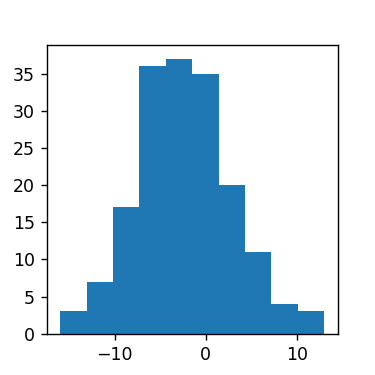

<IPython.core.display.Javascript object>


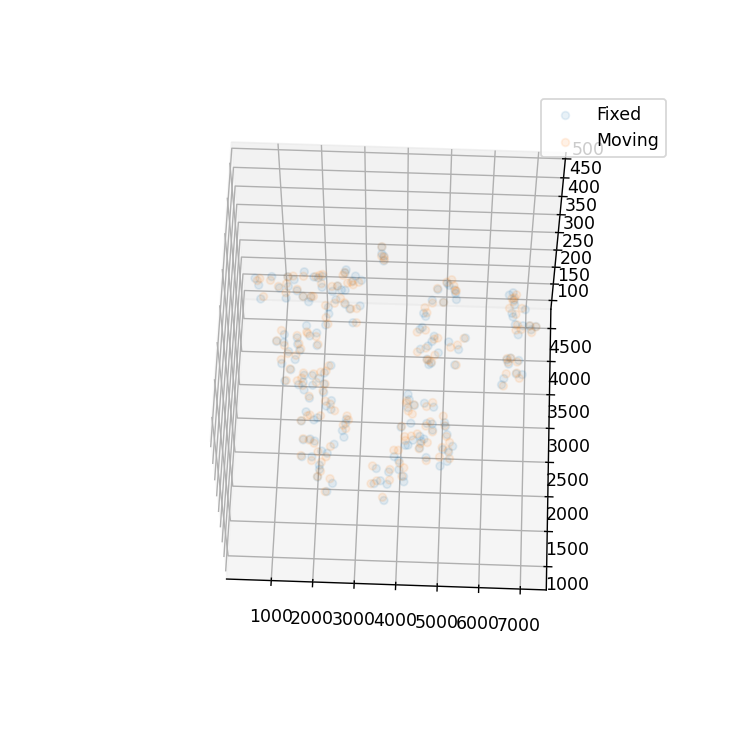

Number of feature matches: 328
Number of RANSAC matches: 173


In [66]:
# Might need to filter out matches that are too far away in z
max_z_difference = 1000


#############
plt.figure(figsize=(3,3))
plt.hist(fixed_coords_r[:,2]-moving_coords_r[:,2])
plt.show()

fixed_new = fixed_coords_r[np.abs(fixed_coords_r[:,2]-moving_coords_r[:,2]) <= max_z_difference]
moving_new = moving_coords_r[np.abs(fixed_coords_r[:,2]-moving_coords_r[:,2]) <=max_z_difference]

#Plot these coordinates
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.scatter(fixed_new[:,0],fixed_new[:,1],fixed_new[:,2],antialiased=True, alpha=0.1)
ax.scatter(moving_new[:,0],moving_new[:,1],moving_new[:,2],antialiased=True,alpha=0.1)
ax.set_zlim3d(fixed_coords_r[:,2].min()-200,fixed_coords_r[:,2].max()+200)
ax.legend(['Fixed','Moving'])


print("Number of feature matches:",fixed_coords_matched.shape[0])
print("Number of RANSAC matches:",fixed_new.shape[0])


np.save(fixed_coords_ransac_path, fixed_new)
np.save(moving_coords_ransac_path, moving_new)

In [67]:
# Convert to JSON

detected_eps_match_path = bdir(name_prefix+'_endpoints_bottom_matched_ransac.npy') # fixed endpoints 
moving_eps_match_path = bdir(name_prefix2+'_endpoints_top_matched_ransac.npy')


#######
detected_eps_match = np.load(detected_eps_match_path)
moving_eps_match = np.load(moving_eps_match_path)
numpy_to_json(detected_eps_match, detected_eps_match_path[:-4]+'.json')
numpy_to_json(moving_eps_match, moving_eps_match_path[:-4]+'.json')

## TPS Warp 

[Return to top](#top)

<a id='tpswarp'></a>

In [117]:
# Read in JSON file with newly labelled 

# Load in the new anchor points (combine the old anchor points with the new ones)

json_path = bdir('r0_anchorpts.json')
new_anchor_pts_moving_path = bdir(name_prefix2+'_anchorwarp_anchor_pts.npy')
new_anchor_pts_fixed_path = bdir(name_prefix+'_anchorwarp_anchor_pts.npy')
moving_name = 'points_4'
fixed_name = 'points_3'

##############
moving_pts_new = read_annotations_json(json_path, moving_name, sink_path=new_anchor_pts_moving_path)
fixed_pts_new = read_annotations_json(json_path, fixed_name, sink_path=new_anchor_pts_fixed_path)


# Also save individually in JSON so that we can visualize 
numpy_to_json(fixed_pts_new, new_anchor_pts_fixed_path[:-4]+'.json')
numpy_to_json(moving_pts_new, new_anchor_pts_moving_path[:-4]+'.json')
print(moving_pts_new.shape, fixed_pts_new.shape)

(551, 3) (551, 3)


In [137]:
# RANSAC these points
apply_ransacc = True
moving_anchor_path = bdir(name_prefix2+'_anchor_pts_flat.npy')
fixed_anchor_path = bdir(name_prefix+'_anchor_pts_flat.npy')
new_anchor_pts_moving_path = bdir(name_prefix2+'_anchorwarp_anchor_pts.npy')
new_anchor_pts_fixed_path = bdir(name_prefix+'_anchorwarp_anchor_pts.npy')

moving_coords_ransac_path = bdir(name_prefix2+'_anchors_ransac.npy')
fixed_coords_ransac_path = bdir(name_prefix+'_anchors_ransac.npy')

# RANSAC
error_threshold = 30 # on the order of 20-40
use_3d = True 
use_local_ransac = True

opts = {'apply_affine_transform' : False, 
        'min_samples' : 1, # this parameter doesn't actually matter
       'num_x_tiles' : 12,
       'num_y_tiles' : 6,
       'size_image' : fixed_img_size[:2],
       'min_matches' : 3}




#################### Filter outliers with RANSAC
fixed_coords_matched = np.concatenate((np.load(fixed_anchor_path),np.load(new_anchor_pts_fixed_path)),axis=0)
moving_coords_matched=np.concatenate((np.load(fixed_anchor_path),np.load(new_anchor_pts_moving_path)),axis=0)
if apply_ransacc:
    fixed_coords_r, moving_coords_r,_,_ = apply_ransac(fixed_coords_matched, moving_coords_matched, 
                                                    error_threshold=error_threshold, use_3d=use_3d, use_local_ransac=use_local_ransac, **opts)
else:
    fixed_coords_r = fixed_coords_matched
    moving_coords_r = moving_coords_matched
    
np.save(fixed_coords_ransac_path, fixed_coords_r)
np.save(moving_coords_ransac_path, moving_coords_r)

print(fixed_coords_r.shape)
print(fixed_coords_matched.shape)

Not enough matches in in tile (0,0), skipping...
Not enough matches in in tile (0,1), skipping...
Not enough matches in in tile (0,2), skipping...
Not enough matches in in tile (0,3), skipping...
Not enough matches in in tile (0,4), skipping...
Number of matches found: 6
Finished filtering tile (0,5)
Not enough matches in in tile (1,0), skipping...
Not enough matches in in tile (1,1), skipping...
Not enough matches in in tile (1,2), skipping...
Number of matches found: 4
Finished filtering tile (1,3)
Number of matches found: 9
Finished filtering tile (1,4)
Not enough matches in in tile (1,5), skipping...
Not enough matches in in tile (2,0), skipping...
Number of matches found: 6
Finished filtering tile (2,1)
Number of matches found: 25
Finished filtering tile (2,2)
Number of matches found: 18
Finished filtering tile (2,3)
Number of matches found: 12
Finished filtering tile (2,4)
Number of matches found: 9
Finished filtering tile (2,5)
Number of matches found: 6
Finished filtering tile 

<IPython.core.display.Javascript object>


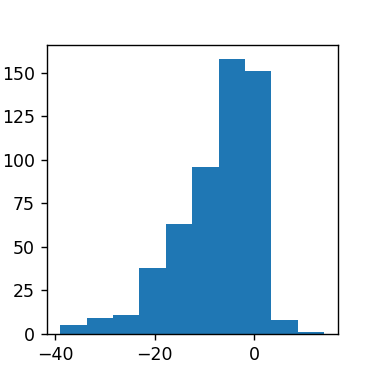

<IPython.core.display.Javascript object>


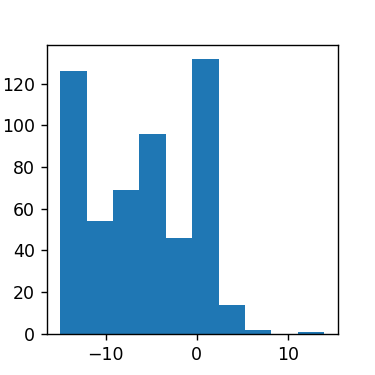

<IPython.core.display.Javascript object>


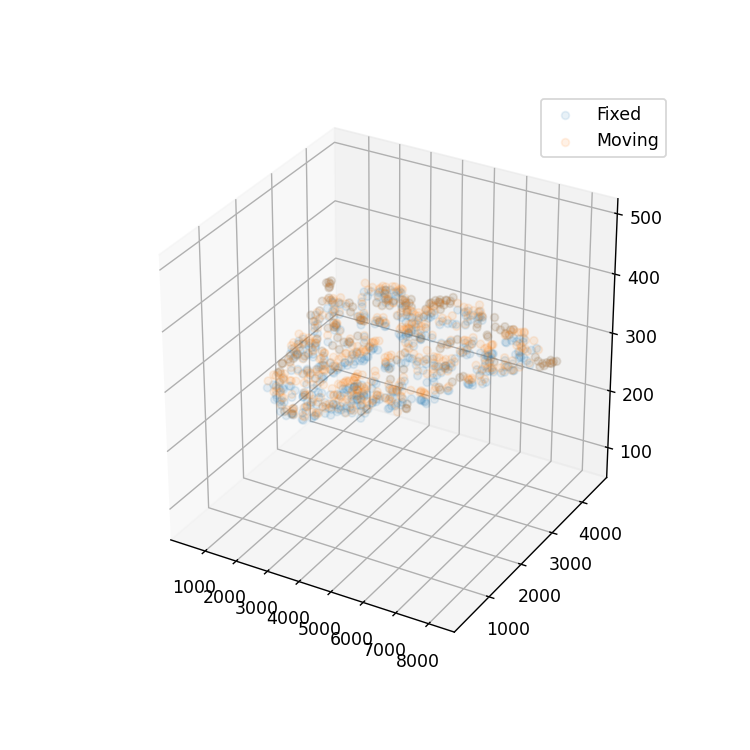

Number of feature matches: 646
Number of RANSAC matches: 540


In [138]:
# Specially for this, we clip all z_differences to be at a max. difference (otherwise get weird stuff happening)
max_z_difference = 15


#############
plt.figure(figsize=(3,3))
plt.hist(fixed_coords_r[:,2]-moving_coords_r[:,2])
plt.show()

fixed_less = fixed_coords_r[np.abs(fixed_coords_r[:,2]-moving_coords_r[:,2]) <= max_z_difference]
moving_less = moving_coords_r[np.abs(fixed_coords_r[:,2]-moving_coords_r[:,2]) <= max_z_difference]
fixed_more = fixed_coords_r[np.abs(fixed_coords_r[:,2]-moving_coords_r[:,2]) > max_z_difference]
moving_more = moving_coords_r[np.abs(fixed_coords_r[:,2]-moving_coords_r[:,2]) > max_z_difference]
diffs =  fixed_more[:,2]-moving_more[:,2]
diffs_new = diffs.copy()
diffs_new[diffs>0] -= max_z_difference
diffs_new[diffs<0] += max_z_difference 

# modify the moving coordinates
moving_more[:,2] += diffs_new
fixed_new = np.concatenate((fixed_more,fixed_less),axis=0)
moving_new = np.concatenate((moving_more,moving_less),axis=0)

plt.figure(figsize=(3,3))
plt.hist(fixed_new[:,2]-moving_new[:,2])
plt.show()

#Plot these coordinates
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.scatter(fixed_new[:,0],fixed_new[:,1],fixed_new[:,2],antialiased=True, alpha=0.1)
ax.scatter(moving_new[:,0],moving_new[:,1],moving_new[:,2],antialiased=True,alpha=0.1)
ax.set_zlim3d(fixed_coords_r[:,2].min()-200,fixed_coords_r[:,2].max()+200)
ax.legend(['Fixed','Moving'])


print("Number of feature matches:",fixed_coords_matched.shape[0])
print("Number of RANSAC matches:",fixed_new.shape[0])


np.save(fixed_coords_ransac_path, fixed_new)
np.save(moving_coords_ransac_path, moving_new)

[[ 9.99998122e-01 -1.90400016e-03  3.62332434e-04]
 [ 1.90435733e-03  9.99997699e-01 -9.87972667e-04]
 [-3.60450500e-04  9.88660822e-04  9.99999446e-01]] [[  6.37011801]
 [-16.92034631]
 [ -7.64502436]]


<IPython.core.display.Javascript object>


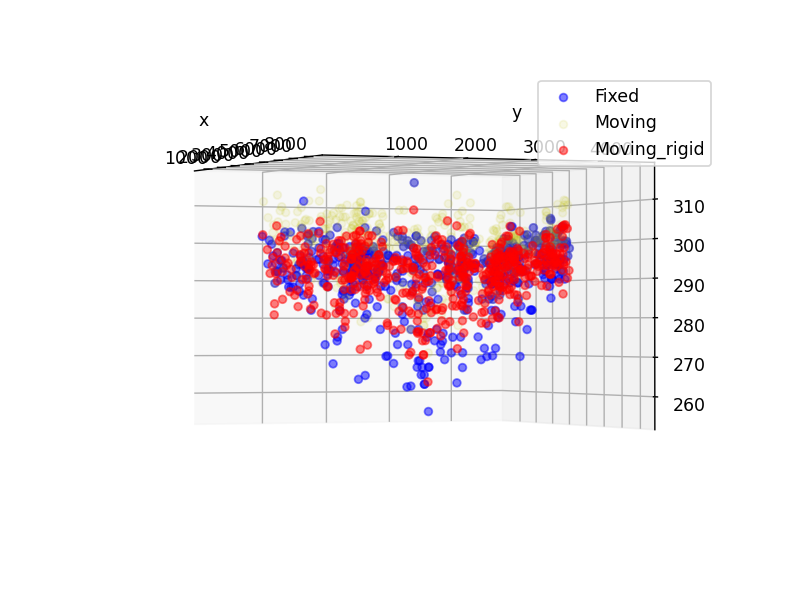

In [139]:
# Perform a rigid transform first with all these points...
flattened_arteries_path = bdir(name_prefix+'_anchors_ransac.npy') # top slab, bottom side
flattened_arteries_path2 = bdir(name_prefix2+'_anchors_ransac.npy') # bottom slab, top side 
plot2d = False # if False, plot points in 3d
use2d = False # don't use 3d, the nonplanar rotation is too sensitive to the endpoint detection
R_path = bdir('R_r1.npy')
b_path = bdir('b_r1.npy')

###############################################
flattened_arteries = np.load(flattened_arteries_path)
flattened_arteries_2 = np.load(flattened_arteries_path2)

# if doing 2d
if use2d:
    R,b = rigid_transform_3D(np.transpose(flattened_arteries_2[:,:2]), np.transpose(flattened_arteries[:,:2]))
    new_pts = np.transpose(np.matmul(R,np.transpose(flattened_arteries_2[:,:2])) + b)
    new_points = np.concatenate((new_pts,flattened_arteries_2[:,2:3]),axis=1) # add in the z coordinate
    
    # needs to be 3x3 for future transforms
    Rn = np.zeros((3,3))
    Rn[:2,:2] = R
    Rn[2,2] = 1
    bn = np.zeros((3,))
    R = Rn
    b = bn
    
# 3d
else:
    R,b = rigid_transform_3D(np.transpose(flattened_arteries_2), np.transpose(flattened_arteries))
    new_points = np.transpose(np.matmul(R,np.transpose(flattened_arteries_2)) + b)
    print(R,b)
    # we don't want to screw with the z coordinate translation
    b[2] = 0

np.save(R_path, R)
np.save(b_path, b.squeeze())

# 2D
fig = plt.figure()

if plot2d:
    ax = fig.add_subplot(1,1,1)#,projection='3d')
    ax.scatter(flattened_arteries[:,0],flattened_arteries[:,1],antialiased=True, alpha=0.5, color='b')
    ax.scatter(flattened_arteries_2[:,0],flattened_arteries_2[:,1],antialiased=True, alpha=0.1, color='r')
    ax.scatter(new_points[:,0],new_points[:,1],antialiased=True,alpha=0.5,color='r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(['Fixed','Moving','Moving_rigid'])

#3d
else:
    ax = fig.add_subplot(1,1,1,projection='3d')
    ax.scatter(flattened_arteries[:,0],flattened_arteries[:,1],flattened_arteries[:,2],antialiased=True, alpha=0.5, color='b')
    ax.scatter(flattened_arteries_2[:,0],flattened_arteries_2[:,1],flattened_arteries_2[:,2],antialiased=True, alpha=0.1,color='y')
    ax.scatter(new_points[:,0],new_points[:,1],new_points[:,2],antialiased=True,alpha=0.5,color='r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(['Fixed','Moving','Moving_rigid'])


In [140]:
# I/O 
# Due to the high nuclei background we use completely manually labelled points 


moving_pts_paths = [bdir(name_prefix2+'_anchors_ransac.npy')]#[bdir(name_prefix2+'_anchorwarp_anchor_pts.npy')]
fixed_pts_paths =  [bdir(name_prefix+'_anchors_ransac.npy')]#[bdir(name_prefix+'_anchorwarp_anchor_pts.npy')]

fixed_zarr_path = bdir(name_prefix+'_flattened.zarr')
moving_zarr_path = bdir(name_prefix2+'_flattened_anchorwarp.zarr')
warped_zarr_path = bdir(name_prefix2+'_flattened_anchorwarp_r1.zarr')


# Parameters for TPS zarr warp
grid_spacing = 3*(32,)
chunks=3*(200,)
nb_workers = 8 

# affine parameters 
R_path = bdir('R_r1.npy')
b_path = bdir('b_r1.npy')

# grid I/O 
save_grid_values_path = bdir('grid_tps_r1_ransac.npy')
use_grid_values_path = None

# anchor parameters (using the surface on the other side and manually identified anchors on the cut surface)
static_pts_paths = [bdir(name_prefix2+'_downsampled_thinsurface_bottom_endpts_outlier_uv_new.npy')]#,
                   #bdir(name_prefix+'_anchor_pts_flat.npy')]

##########################

TPS_warp(moving_zarr_path, fixed_zarr_path, warped_zarr_path, moving_pts_paths, fixed_pts_paths,
         static_pts_paths=static_pts_paths, R_path=R_path, b_path=b_path,
          grid_spacing=grid_spacing, smooth=2, chunks=chunks,
          nb_workers=nb_workers, padding=2, save_grid_values_path=save_grid_values_path, 
          show_residuals=True, use_grid_values_path=use_grid_values_path)

# Convert zarr to tiff
tiff_path = warped_zarr_path[:-5]+'_tiffs'
convert_zarr_to_tiff(warped_zarr_path, tiff_path, num_workers=None)

Fitting radial basis function...
Fitting rbf took 89.170575 seconds
Nonrigid ave. distance [pixels]: 0.002711952824951333
Warping grid...
Warping grid took 426.387802 seconds
Saved grid_values at /mnt/beegfs/webster/fig3_dfly/grid_tps_r1_ransac.npy
Warping image...


100%|██████████| 3096/3096 [06:19<00:00,  8.15it/s]


Time elapsed: 21.433298 minutes
Loading z 0 - 200


100%|██████████| 200/200 [04:59<00:00,  1.42s/it]


Loading z 200 - 400


100%|██████████| 200/200 [05:18<00:00,  1.62s/it]


Loading z 400 - 556


100%|██████████| 156/156 [04:02<00:00,  1.62s/it]


In [143]:

# Get inverse R,b 
R_path = bdir('R.npy')
b_path = bdir('b.npy')
R = np.load(R_path); b = np.load(b_path)
Rinv,binv = get_inverse_rigid_transform(R,b)
np.save(bdir('Rinv.npy'),Rinv)
np.save(bdir('binv.npy'),binv)

In [144]:
# FIrst we have to transform all of the bottom_r1 labelled points back into the flattened frame

moving_pts_paths = [bdir(name_prefix+'_anchor_pts_flat.npy')] # these are switched from normal
fixed_pts_paths =  [bdir(name_prefix2+'_anchor_pts_flat.npy')]

pts_transform_paths = [bdir(name_prefix2+'_anchorwarp_anchor_pts.npy')] # transform both of these back to the anchorwarp frame
pts_transform_save_paths = [bdir(name_prefix2+'_anchorwarp_anchor_pts_flat.npy')] 

# Other surface points for anchoring the transformation
static_pts_path = [bdir(name_prefix2+'_downsampled_thinsurface_bottom_endpts_outlier_uv_new.npy')]

# Affine parameters, need to actually get the inverse of this 
R_path = bdir('Rinv.npy')
b_path = bdir('binv.npy')

##############################
# TPS transform    
_ = TPS_transform_points(moving_pts_paths, fixed_pts_paths, pts_masked_paths=pts_transform_paths, 
                     pts_masked_save_paths=pts_transform_save_paths, static_pts_paths=static_pts_paths, 
                    R_path=R_path, b_path=b_path)

Fitting radial basis function...
Fitting rbf took 62.976314 seconds


In [148]:
moving_pts_paths = [bdir(name_prefix2+'_anchor_pts_flat.npy'),
                   bdir(name_prefix2+'_anchorwarp_anchor_pts_flat.npy')]
fixed_pts_paths =  [bdir(name_prefix+'_anchor_pts_flat.npy'),
                   bdir(name_prefix+'_anchorwarp_anchor_pts.npy')]

fixed_zarr_path = bdir(name_prefix+'_flattened.zarr')
moving_zarr_path = bdir(name_prefix2+'_flattened.zarr')
warped_zarr_path = bdir(name_prefix2+'_flattened_anchorwarp_allanchors.zarr')


# Parameters for TPS zarr warp
grid_spacing = 3*(32,)
chunks=3*(200,)
nb_workers = 8 

# affine parameters 
R_path = bdir('R.npy')
b_path = bdir('b.npy')

# grid I/O 
save_grid_values_path = bdir('grid_anchor_tps_allanchors.npy')
use_grid_values_path = None

# anchor parameters (using the surface on the other side and manually identified anchors on the cut surface)
static_pts_paths = [bdir(name_prefix2+'_downsampled_thinsurface_bottom_endpts_outlier_uv_new.npy')]

##########################

TPS_warp(moving_zarr_path, fixed_zarr_path, warped_zarr_path, moving_pts_paths, fixed_pts_paths,
         static_pts_paths=static_pts_paths, R_path=R_path, b_path=b_path,
          grid_spacing=grid_spacing, smooth=2, chunks=chunks,
          nb_workers=nb_workers, padding=2, save_grid_values_path=save_grid_values_path, 
          show_residuals=True, use_grid_values_path=use_grid_values_path)

# Convert zarr to tiff
tiff_path = warped_zarr_path[:-5]+'_tiffs'
convert_zarr_to_tiff(warped_zarr_path, tiff_path, num_workers=None)

Fitting radial basis function...
Fitting rbf took 93.848918 seconds
Nonrigid ave. distance [pixels]: 0.00041231027936191776
Warping grid...
Warping grid took 462.484460 seconds
Saved grid_values at /mnt/beegfs/webster/fig3_dfly/grid_anchor_tps_allanchors.npy
Warping image...


100%|██████████| 3096/3096 [07:52<00:00,  4.41it/s]


Time elapsed: 26.107373 minutes
Loading z 0 - 200


100%|██████████| 200/200 [04:57<00:00,  1.40s/it]


Loading z 200 - 400


100%|██████████| 200/200 [05:13<00:00,  1.38s/it]


Loading z 400 - 556


100%|██████████| 156/156 [04:05<00:00,  1.55s/it]


## Round 2

Relabel some more points, transform back to flattened space, then warp everything

[Return to top](#top)

<a id='round2'></a>

In [149]:
# Read in JSON file with newly labelled 

# Load in the new anchor points (combine the old anchor points with the new ones)

json_path = bdir('r1_anchorpts.json')
new_anchor_pts_moving_path = bdir(name_prefix2+'_anchorwarp_anchor_pts_r2.npy')
new_anchor_pts_fixed_path = bdir(name_prefix+'_anchorwarp_anchor_pts_r2.npy')
moving_name = 'points_4'
fixed_name = 'points_3'

##############
moving_pts_new = read_annotations_json(json_path, moving_name, sink_path=new_anchor_pts_moving_path)
fixed_pts_new = read_annotations_json(json_path, fixed_name, sink_path=new_anchor_pts_fixed_path)


# Also save individually in JSON so that we can visualize 
numpy_to_json(fixed_pts_new, new_anchor_pts_fixed_path[:-4]+'.json')
numpy_to_json(moving_pts_new, new_anchor_pts_moving_path[:-4]+'.json')
print(moving_pts_new.shape, fixed_pts_new.shape)

(53, 3) (53, 3)


In [150]:
# FIrst we have to transform all of the bottom_r1 labelled points back into the flattened frame

moving_pts_paths = [bdir(name_prefix+'_anchor_pts_flat.npy'),
                   bdir(name_prefix+'_anchorwarp_anchor_pts.npy')] # these are switched from normal
fixed_pts_paths =  [bdir(name_prefix2+'_anchor_pts_flat.npy'),
                   bdir(name_prefix2+'_anchorwarp_anchor_pts_flat.npy')]

pts_transform_paths = [bdir(name_prefix2+'_anchorwarp_anchor_pts_r2.npy')] # transform both of these back to the anchorwarp frame
pts_transform_save_paths = [bdir(name_prefix2+'_anchorwarp_anchor_pts_r2_flat.npy')] 

# Other surface points for anchoring the transformation
static_pts_path = [bdir(name_prefix2+'_downsampled_thinsurface_bottom_endpts_outlier_uv_new.npy')]

# Affine parameters, need to actually get the inverse of this 
R_path = bdir('Rinv.npy')
b_path = bdir('binv.npy')

##############################
# TPS transform    
_ = TPS_transform_points(moving_pts_paths, fixed_pts_paths, pts_masked_paths=pts_transform_paths, 
                     pts_masked_save_paths=pts_transform_save_paths, static_pts_paths=static_pts_paths, 
                    R_path=R_path, b_path=b_path)

Fitting radial basis function...
Fitting rbf took 90.772248 seconds


In [151]:
moving_pts_paths = [bdir(name_prefix2+'_anchor_pts_flat.npy'),
                   bdir(name_prefix2+'_anchorwarp_anchor_pts_flat.npy'),
                   bdir(name_prefix2+'_anchorwarp_anchor_pts_r2_flat.npy')]
fixed_pts_paths =  [bdir(name_prefix+'_anchor_pts_flat.npy'),
                   bdir(name_prefix+'_anchorwarp_anchor_pts.npy'),
                   bdir(name_prefix+'_anchorwarp_anchor_pts_r2.npy')]

fixed_zarr_path = bdir(name_prefix+'_flattened.zarr')
moving_zarr_path = bdir(name_prefix2+'_flattened.zarr')
warped_zarr_path = bdir(name_prefix2+'_flattened_anchorwarp_allanchors_r2.zarr')


# Parameters for TPS zarr warp
grid_spacing = 3*(32,)
chunks=3*(200,)
nb_workers = 8 

# affine parameters 
R_path = bdir('R.npy')
b_path = bdir('b.npy')

# grid I/O 
save_grid_values_path = bdir('grid_anchor_tps_allanchors_r2.npy')
use_grid_values_path = None

# anchor parameters (using the surface on the other side and manually identified anchors on the cut surface)
static_pts_paths = [bdir(name_prefix2+'_downsampled_thinsurface_bottom_endpts_outlier_uv_new.npy')]

##########################

TPS_warp(moving_zarr_path, fixed_zarr_path, warped_zarr_path, moving_pts_paths, fixed_pts_paths,
         static_pts_paths=static_pts_paths, R_path=R_path, b_path=b_path,
          grid_spacing=grid_spacing, smooth=2, chunks=chunks,
          nb_workers=nb_workers, padding=2, save_grid_values_path=save_grid_values_path, 
          show_residuals=True, use_grid_values_path=use_grid_values_path)

# Convert zarr to tiff
tiff_path = warped_zarr_path[:-5]+'_tiffs'
convert_zarr_to_tiff(warped_zarr_path, tiff_path, num_workers=None)

Fitting radial basis function...
Fitting rbf took 87.230734 seconds
Nonrigid ave. distance [pixels]: 0.0004993119787503188
Warping grid...
Warping grid took 456.680219 seconds
Saved grid_values at /mnt/beegfs/webster/fig3_dfly/grid_anchor_tps_allanchors_r2.npy
Warping image...


100%|██████████| 3096/3096 [07:11<00:00,  7.17it/s]


Time elapsed: 24.495196 minutes
Loading z 0 - 200


100%|██████████| 200/200 [05:21<00:00,  1.83s/it]


Loading z 200 - 400


100%|██████████| 200/200 [05:53<00:00,  1.63s/it]


Loading z 400 - 556


100%|██████████| 156/156 [04:25<00:00,  1.59s/it]
